In [2]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\carlv\AppData\Local\Temp\ipykernel_27552\1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [36]:
df = pd.read_csv('data/energy_provision.csv', index_col=0)
df

,PV,Wind,BESS,"('PV', 'Wind')","('PV', 'BESS')","('Wind', 'BESS')","('PV', 'Wind', 'BESS')"
PV y,1642.64,NaN,NaN,NaN,NaN,NaN,NaN
Wind y,NaN,1626.88,NaN,NaN,NaN,NaN,NaN
BESS y,NaN,NaN,44.23,NaN,NaN,NaN,NaN
PV + Wind y,NaN,NaN,NaN,1728.09,NaN,NaN,NaN
PV y1,NaN,NaN,NaN,868.12,1644.46,NaN,868.24
Wind y2,NaN,NaN,NaN,859.97,NaN,NaN,NaN
PV + BESS y,NaN,NaN,NaN,NaN,1681.03,NaN,NaN
BESS y2,NaN,NaN,NaN,NaN,36.57,36.78,NaN
Wind + BESS y,NaN,NaN,NaN,NaN,NaN,1669.14,NaN
Wind y1,NaN,NaN,NaN,NaN,NaN,1632.36,NaN


In [37]:
# modify to include only rows not containing '+'
df = df[~df.index.str.contains('\+')]
df
# move indexes into first 3 indexes with start with same first character
df.index = df.index.str.extract('([A-Za-z]+)')[0]
df = df.groupby(df.index).first()
df = df.transpose()
df

,BESS,PV,Wind
PV,NaN,1642.64,NaN
Wind,NaN,NaN,1626.88
BESS,44.23,NaN,NaN
"('PV', 'Wind')",NaN,868.12,859.97
"('PV', 'BESS')",36.57,1644.46,NaN
"('Wind', 'BESS')",36.78,NaN,1632.36
"('PV', 'Wind', 'BESS')",36.69,868.24,860.10


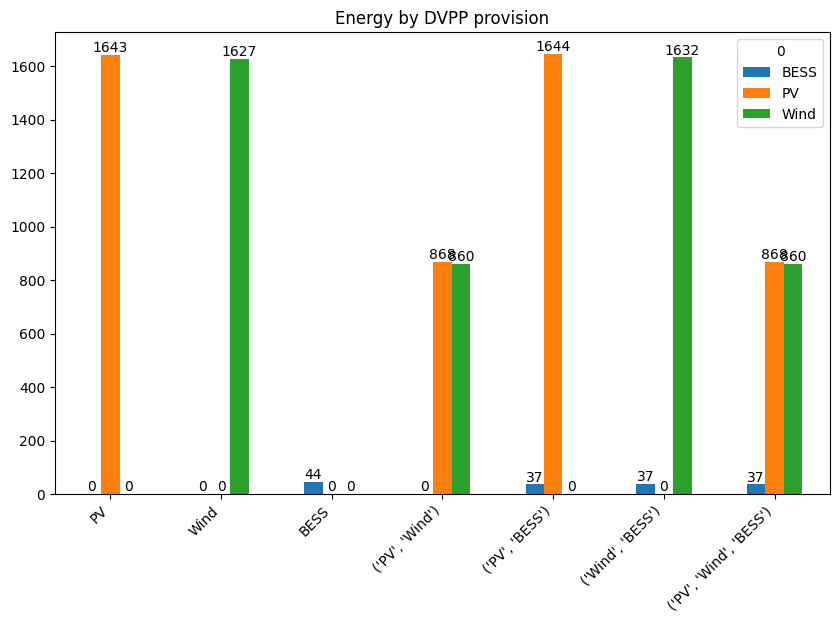

In [43]:
# make grouped bar chart for each column
ax = df.plot(kind='bar', figsize=(10, 6),
             title='Energy by DVPP provision')
plt.xticks(rotation=45, ha='right')
# show numbers above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()